In [1]:
import pandas as pd
import numpy as np
import natsort
import glob
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
dir='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20220117/Function_Generator_MCA_Check/'
filenames=[]
for file in os.listdir(dir):
    filenames.append(dir+file)
total_counts_list=[]
for files in natsort.natsorted(filenames):
    df_temp=pd.read_csv(files)
    real_time=df_temp.columns[1]
    df=pd.read_csv(files,skiprows=1)
    total_counts=np.sum(df['Counts'])
    total_counts_list.append(total_counts)
    time_delay=total_counts*12.8E-6
#     print('Real Time: ',real_time,'Total Counts: ',total_counts,'Time Delay: ',time_delay)

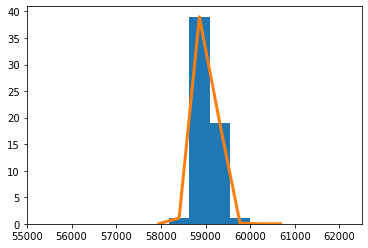

In [7]:
BINS=np.linspace(50000,70000,45)
def gauss(x,a,mu,sigma):
    return a*np.exp(-0.5*((x-mu)/sigma)**2)
vals,bine=np.histogram(total_counts_list,bins=BINS)
plt.hist(total_counts_list,bins=BINS)
binc=0.5*(bine[1:]+bine[:-1])
cut=np.where((binc>57500) & (binc<61000))
popt,pcov=curve_fit(gauss,binc[cut],vals[cut],p0=[35,59000,200])
plt.plot(binc[cut],gauss(binc[cut],*popt),lw=3)
plt.xlim(55000,62500)
plt.show()